In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Step 1: Load the rental price data and short-term rental permit data
rental_prices = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/avg_monthly_rent.csv')
permits = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/Residential_Short_Term_Rental_Permits (1).csv')

In [3]:
print(rental_prices.head)

<bound method NDFrame.head of         Date  Avg Rent per_change
0   1/1/2001       NaN        NaN
1   1/1/2002       NaN    #DIV/0!
2   1/1/2003       NaN    #DIV/0!
3   1/1/2004       NaN    #DIV/0!
4   1/1/2005       NaN    #DIV/0!
5   1/1/2006       NaN    #DIV/0!
6   1/1/2007       NaN    #DIV/0!
7   1/1/2008    938.00    #DIV/0!
8   1/1/2009    987.00       0.05
9   1/1/2010   1047.00       0.06
10  1/1/2011   1067.00       0.02
11  1/1/2012    974.00      -0.09
12  1/1/2013   1089.00       0.12
13  1/1/2014   1131.00       0.04
14  1/1/2015   1201.66       0.06
15  1/1/2016   1251.66       0.04
16  1/1/2017   1311.57       0.05
17  1/1/2018   1356.17       0.03
18  1/1/2019   1406.72       0.04
19  1/1/2020   1476.52       0.05
20  1/1/2021   1504.67       0.02
21  1/1/2022   1789.93       0.19
22  1/1/2023   1903.75       0.06>


In [4]:
# Get the column names
column_names = rental_prices.columns

# Print the column names
print(column_names)

Index(['Date', 'Avg Rent', 'per_change'], dtype='object')


In [5]:
# Get the column names
column_names = permits.columns

# Print the column names
print(column_names)

Index(['Permit #', 'Applicant', 'Contact', 'Permit Subtype Description',
       'Permit Status', 'Parcel', 'Date Entered', 'Date Issued',
       'Expiration Date', 'Address', 'City', 'State', 'ZIP',
       'Subdivision / Lot', 'Purpose', 'Permit Owner Name',
       'Permit Owner Addr. 1', 'Permit Owner Addr. 2', 'Permit Owner Addr. 3',
       'Permit Owner City', 'Permit Owner State', 'Permit Owner ZIP',
       'Permit Type', 'Permit Subtype', 'Council District', 'Census Tract',
       'Mapped Location'],
      dtype='object')


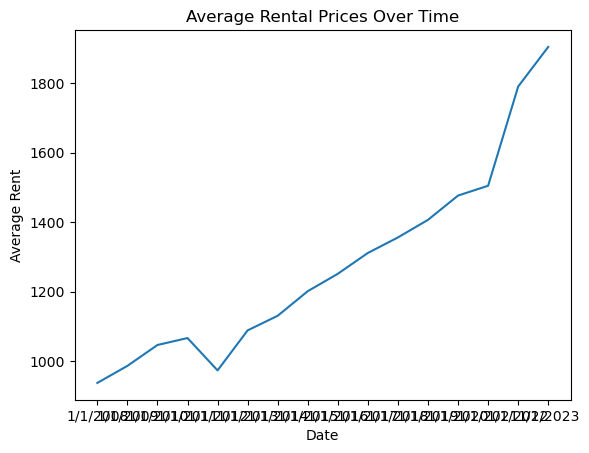

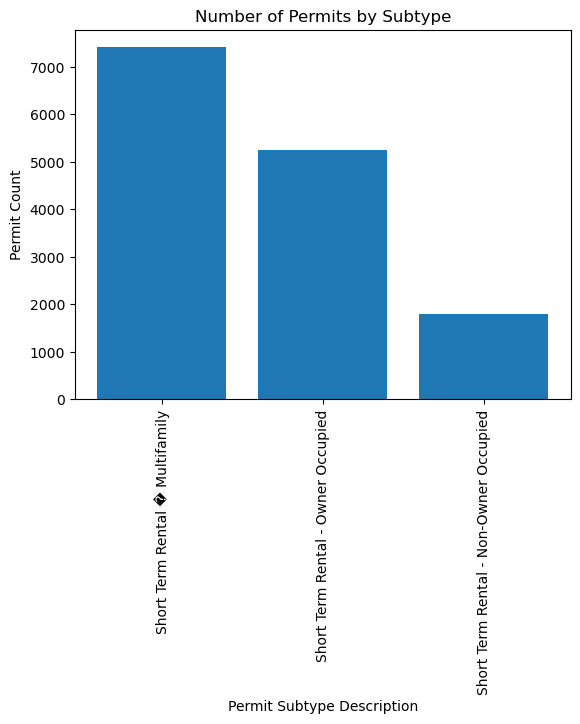

In [6]:
# Load the rental price data
rental_prices = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/avg_monthly_rent.csv')
# Load the short-term rental permit data
permits = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/Residential_Short_Term_Rental_Permits (1).csv')

# Plot rental prices
plt.plot(rental_prices['Date'], rental_prices['Avg Rent'])
plt.xlabel('Date')
plt.ylabel('Average Rent')
plt.title('Average Rental Prices Over Time')
plt.show()

# Plot permit data
permit_counts = permits['Permit Subtype Description'].value_counts()
plt.bar(permit_counts.index, permit_counts.values)
plt.xlabel('Permit Subtype Description')
plt.ylabel('Permit Count')
plt.title('Number of Permits by Subtype')
plt.xticks(rotation=90)
plt.show()


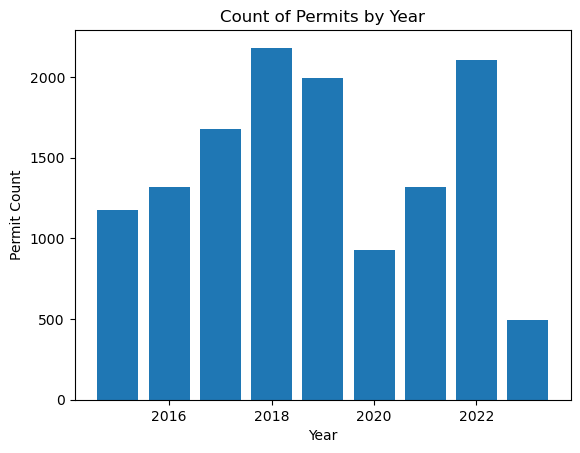

In [7]:
# Load the permit data
permits = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/Residential_Short_Term_Rental_Permits (1).csv')

# Convert 'Date Issued' column to datetime
permits['Date Issued'] = pd.to_datetime(permits['Date Issued'])

# Extract year from 'Date Issued' column
permits['Year'] = permits['Date Issued'].dt.year

# Calculate the count of permits per year
permit_counts_per_year = permits['Year'].value_counts().sort_index()

# Plot the count of permit numbers per year
plt.bar(permit_counts_per_year.index, permit_counts_per_year.values)
plt.xlabel('Year')
plt.ylabel('Permit Count')
plt.title('Count of Permits by Year')
plt.show()


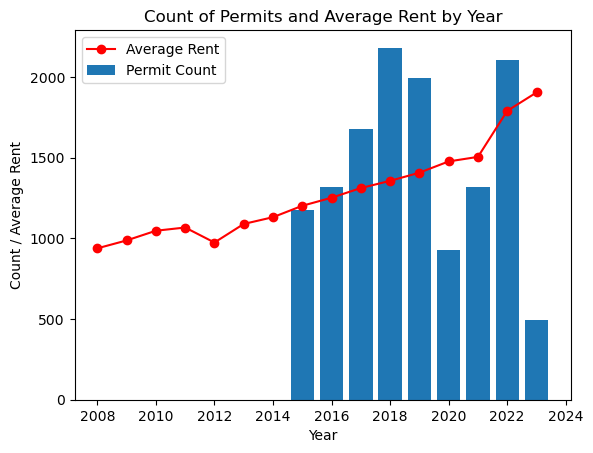

In [8]:
# Load the permit data
permits = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/Residential_Short_Term_Rental_Permits (1).csv')
# Load the rental price data
rental_prices = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/avg_monthly_rent.csv')

# Convert 'Date Issued' column to datetime in permits data
permits['Date Issued'] = pd.to_datetime(permits['Date Issued'])
# Convert 'Date' column to datetime in rental prices data
rental_prices['Date'] = pd.to_datetime(rental_prices['Date'])

# Extract year from 'Date Issued' column in permits data
permits['Year'] = permits['Date Issued'].dt.year

# Calculate the count of permits per year
permit_counts_per_year = permits['Year'].value_counts().sort_index()

# Calculate the average rental price per year
avg_rent_per_year = rental_prices.groupby(rental_prices['Date'].dt.year)['Avg Rent'].mean()

# Plot the count of permit numbers per year
plt.bar(permit_counts_per_year.index, permit_counts_per_year.values, label='Permit Count')

# Plot the line showing rental price increases over time
plt.plot(avg_rent_per_year.index, avg_rent_per_year.values, color='red', marker='o', linestyle='-', label='Average Rent')

plt.xlabel('Year')
plt.ylabel('Count / Average Rent')
plt.title('Count of Permits and Average Rent by Year')
plt.legend()
plt.show()


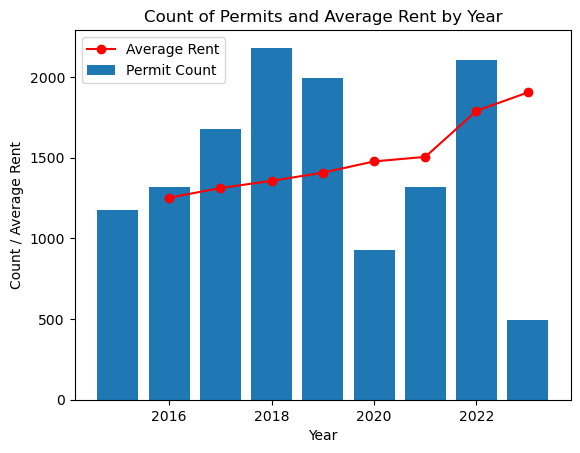

In [9]:
# Load the permit data
permits = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/Residential_Short_Term_Rental_Permits (1).csv')
# Load the rental price data
rental_prices = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/avg_monthly_rent.csv')

# Convert 'Date Issued' column to datetime in permits data
permits['Date Issued'] = pd.to_datetime(permits['Date Issued'])
# Convert 'Date' column to datetime in rental prices data
rental_prices['Date'] = pd.to_datetime(rental_prices['Date'])

# Extract year from 'Date Issued' column in permits data
permits['Year'] = permits['Date Issued'].dt.year

# Calculate the count of permits per year
permit_counts_per_year = permits['Year'].value_counts().sort_index()

# Calculate the average rental price per year and limit to 2016-2023
avg_rent_per_year = rental_prices.loc[(rental_prices['Date'].dt.year >= 2016) & (rental_prices['Date'].dt.year <= 2023)]
avg_rent_per_year = avg_rent_per_year.groupby(avg_rent_per_year['Date'].dt.year)['Avg Rent'].mean()

# Plot the count of permit numbers per year
plt.bar(permit_counts_per_year.index, permit_counts_per_year.values, label='Permit Count')

# Plot the line showing rental price increases over time
plt.plot(avg_rent_per_year.index, avg_rent_per_year.values, color='red', marker='o', linestyle='-', label='Average Rent')

plt.xlabel('Year')
plt.ylabel('Count / Average Rent')
plt.title('Count of Permits and Average Rent by Year')
plt.legend()
plt.show()
